In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [3]:
df = pd.read_csv('Twitter Data.csv')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [9]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [11]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "#[/w]*")

In [13]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test https://goo.gl/h1Mf...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? talk makememories ...
3,4,0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [15]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test https://goo.gl/h1Mf...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? talk makememories ...
3,4,0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [17]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test https://goo.gl/h1Mf...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love this! Would talk makememories unplug rela...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know George made that iphone cute davent...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk ab...


In [19]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [fingerprint, Pregnancy, Test, https://goo.gl/...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this!, Would, talk, makememories, unplu...
3    [wired, know, George, made, that, iphone, cute...
4    [What, amazing, service!, Apple, won't, even, ...
Name: clean_tweet, dtype: object

In [21]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [fingerprint, pregnanc, test, https://goo.gl/h...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, this!, would, talk, makememori, unplug,...
3    [wire, know, georg, made, that, iphon, cute, d...
4    [what, amaz, service!, appl, won't, even, talk...
Name: clean_tweet, dtype: object

In [23]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnanc test https://goo.gl/h1mfq...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl soni xp...
2,3,0,We love this! Would you go? #talk #makememorie...,love this! would talk makememori unplug relax ...
3,4,0,I'm wired I know I'm George I was made that wa...,wire know georg made that iphon cute daventri ...
4,5,1,What amazing service! Apple won't even talk to...,what amaz service! appl won't even talk about ...


In [25]:
#Exploratory Data Analysis


In [30]:
!pip install wordcloud

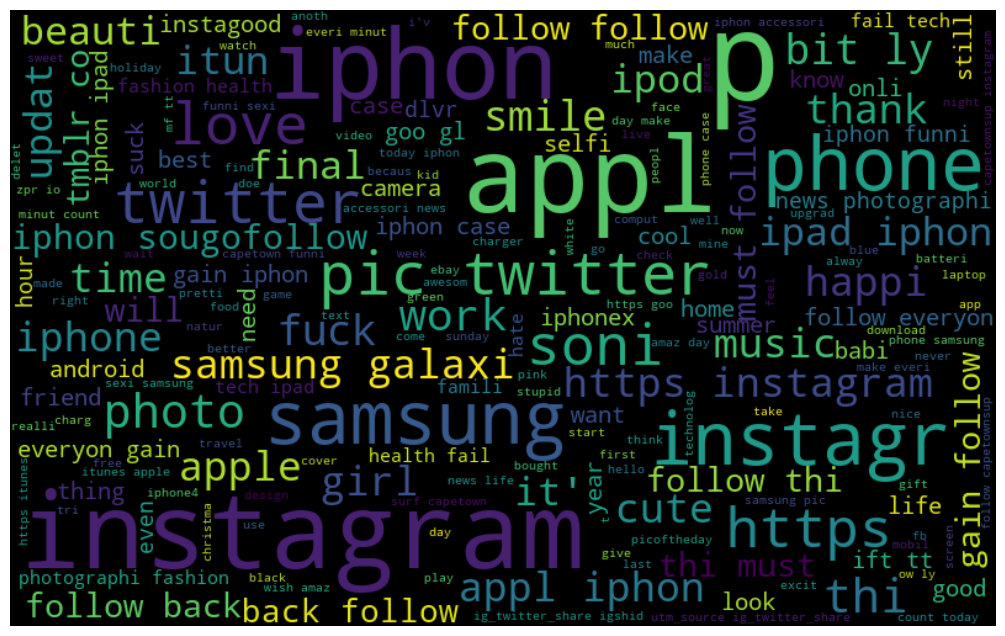

In [32]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

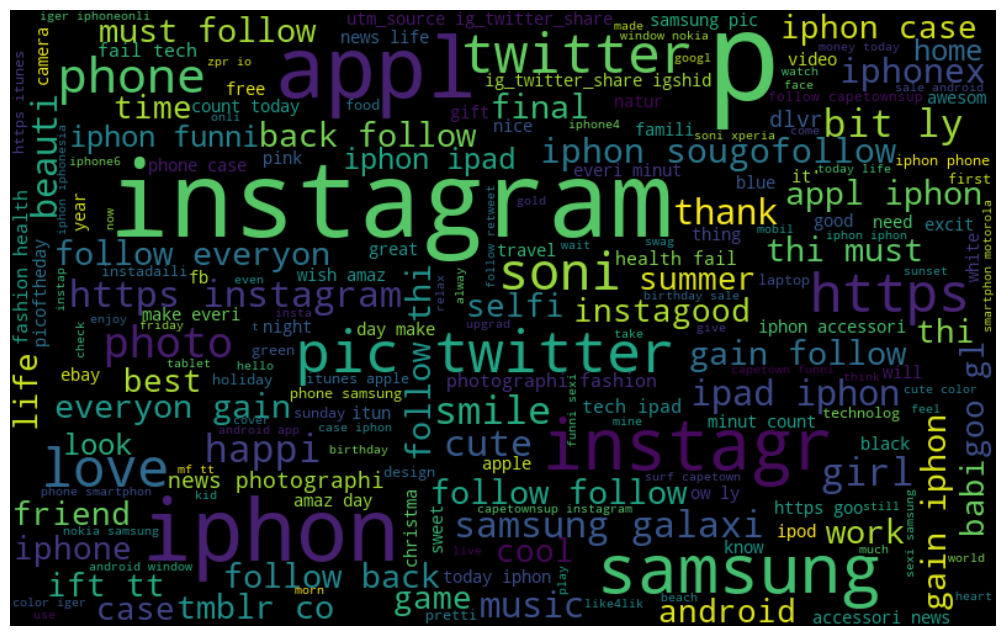

In [34]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



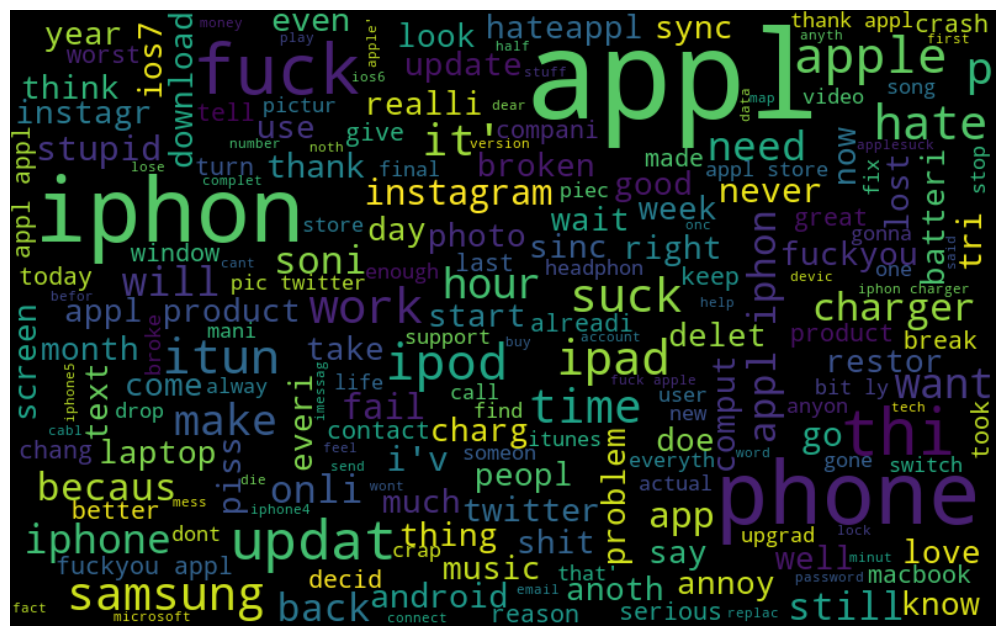

In [36]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [38]:
#Vectorizing the tweets using TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = 'english')
data_vec = vec.fit_transform(df['clean_tweet'])

In [40]:
data_vec

<7920x21274 sparse matrix of type '<class 'numpy.float64'>'
	with 98383 stored elements in Compressed Sparse Row format>

In [42]:
df.shape

(7920, 4)

In [44]:
#Seperating label y from the train_data
y = df.label
type(y)

pandas.core.series.Series

In [46]:
y = y.values
type(y)

numpy.ndarray

In [48]:
#Value counts of 0 and 1 to check the imbalance of the data
pd.Series(y).value_counts()

0    5894
1    2026
Name: count, dtype: int64

In [56]:
#Splitting the train data into X_train, y_train (train_set), X_test, y_test (test_set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size = 0.2, stratify = y,  random_state=42)

In [58]:
!pip install imbalanced-learn

In [60]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

In [63]:
!pip install delayed

In [65]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

In [67]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [69]:
y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8939393939393939

In [80]:
!pip install xgboost


In [86]:
#XGBClassifier
from xgboost import XGBClassifier 
model3 = XGBClassifier()
model3.fit(X_res, y_res)
y_pred3 = model3.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.8819444444444444

In [90]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_res, y_res)
y_pred2 = model2.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.889520202020202

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1065  114]
 [  54  351]]


In [98]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)




Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      1179
           1       0.75      0.87      0.81       405

    accuracy                           0.89      1584
   macro avg       0.85      0.88      0.87      1584
weighted avg       0.90      0.89      0.90      1584



In [100]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", auc)


ROC-AUC Score: 0.9492759086482581


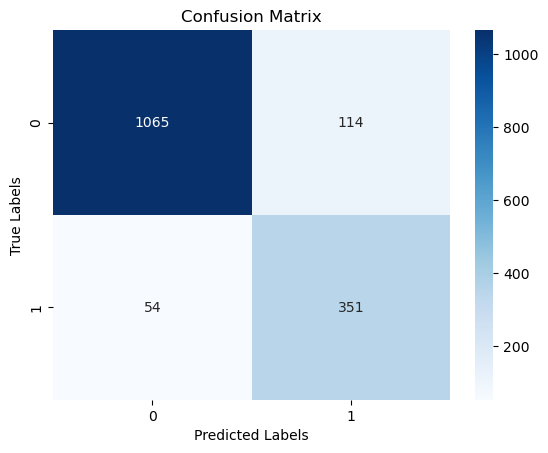

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


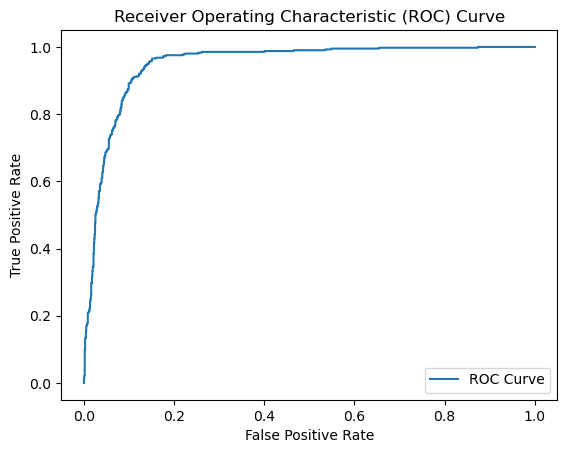

In [104]:
from sklearn.metrics import roc_curve

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


In [112]:
import pickle

# Save the model
with open('hate_speech_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'hate_speech_model.pkl'")


Model saved as 'hate_speech_model.pkl'


In [116]:
# Load the model
with open('hate_speech_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")




Model loaded successfully


In [120]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Sample dataset for demonstration
text_data = ["This is good", "This is bad", "I hate you", "I love you"]
labels = [0, 0, 1, 1]  # 1 for hate speech, 0 for non-hate speech

# 1. Vectorize the data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# 2. Train a model
model = LogisticRegression()
model.fit(X, labels)

# 3. Save the model and vectorizer using pickle
with open('hate_speech_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully.")



Model and vectorizer saved successfully.


In [140]:
import pickle

# 1. Load the saved model and vectorizer
with open('hate_speech_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)

print("iPhone software update fucked up my phone big time Stupid iPhones ")

# 2. Input new text for prediction
new_text = ["iPhone software update fucked up my phone big time Stupid iPhones"]

# 3. Preprocess and vectorize the new text (same as during training)
new_text_vectorized = loaded_vectorizer.transform(new_text)

# 4. Predict using the loaded model
prediction = loaded_model.predict(new_text_vectorized)

# 5. Output the result
if prediction[0] == 1:
    print("The input text is classified as hate speech.")
else:
    print("The input text is NOT classified as hate speech.")


iPhone software update fucked up my phone big time Stupid iPhones 
The input text is classified as hate speech.
